<a href="https://colab.research.google.com/github/Rithvik77777/OIBSIP-DS-Task-2/blob/main/UNEMPLOYMENTANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**INITIALIZING THE DATASET**

In [ ]:
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


**INITIALIZING COLUMNS**

In [ ]:
data.columns= ["States","Date","Frequency","Estimated Unemploy","Estimated Employed","Estimated Labour Participation Rate","Region","longitude","latitude"]

In [ ]:
data['Date'] = pd.to_datetime (data[ 'Date'], dayfirst=True)
data['Frequency']= data['Frequency'].astype('category')
data['Month'] = data['Date'].dt.month
data['Month_int'] = data['Month'].apply(lambda x : int(x))


**PLOTTING UNEMPLOYMENT RATE USING MULTIPLE GRAPHS**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import datetime as dt
import plotly.io as pio
pio.templates
import calendar

In [ ]:
unemployment = data[["State", "Region", "EUR"]]

fig = px.sunburst(unemployment, path=['Region','State'], values='EUR',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()


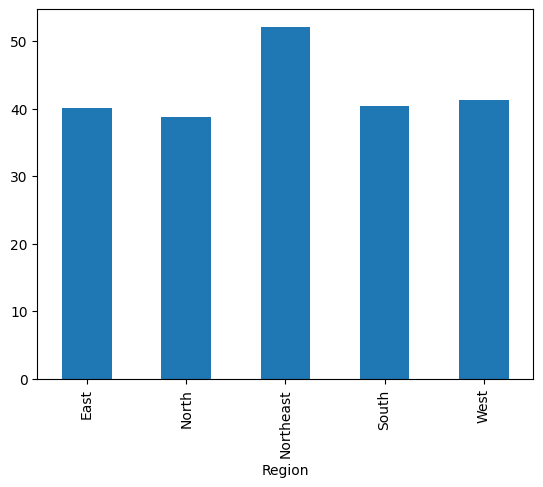

In [ ]:
region_participation = data.groupby('Region')['Estimated Labour Participation Rate'].mean()
region_participation.plot(kind='bar')
plt.show()

In [ ]:

lock = data[(data['Month_int'] >= 4) & (data['Month_int'] <=7)]

bf_lock = data[(data['Month_int'] >= 1) & (data['Month_int'] <=4)]
g_lock = lock.groupby('States')['Estimated Unemploy'].mean().reset_index()

g_bf_lock = bf_lock.groupby('States')['Estimated Unemploy'].mean().reset_index()


g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemploy']

g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

In [ ]:
g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)
plot_per = g_lock.sort_values('percentage change in unemployment')
fig = px.bar(plot_per, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')

fig.show()

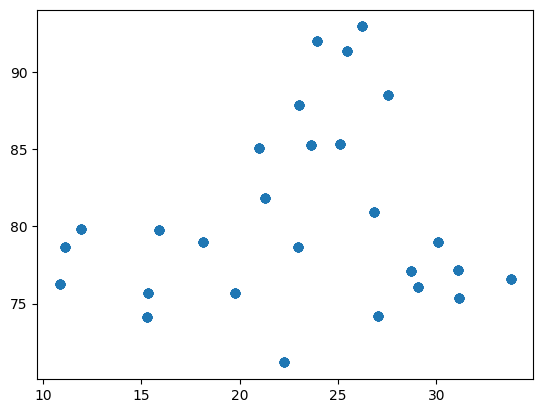

In [ ]:
plt.scatter(data['longitude'], data['latitude'])
plt.show()

In [ ]:
fig = px.box(data,x='States',y='Estimated Unemploy',color='States',title='Unemployment rate',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
plot_per['impact status'] = plot_per['percentage change in unemployment']
fig = px.bar(plot_per, y='States',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=500)


fig.show()

In [ ]:
data = data[~data.index.duplicated(keep='first')]

In [ ]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [ ]:
data.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated Unemploy                     0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
Month                                  0
Month_int                              0
year                                   0
month                                  0
day                                    0
dtype: int64

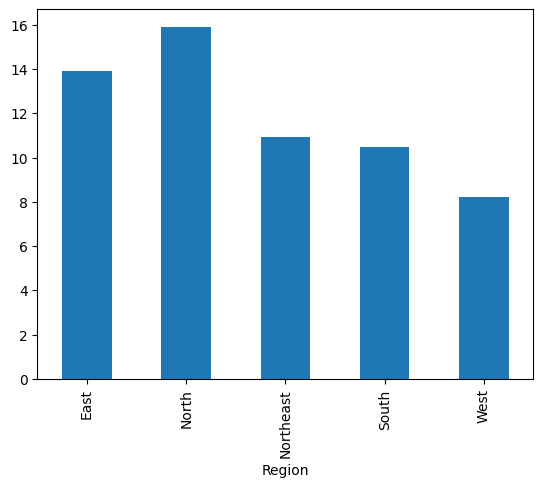

In [ ]:
region_unemployment = data.groupby('Region')['Estimated Unemploy'].mean()
region_unemployment.plot(kind='bar')
plt.show()

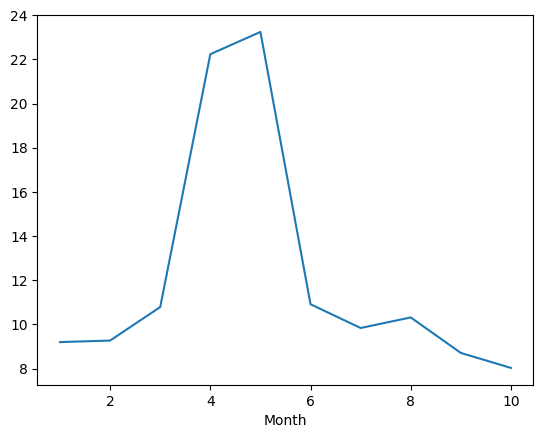

In [ ]:
data['Month'] = data['Date'].dt.month
month_unemployment = data.groupby('Month')['Estimated Unemploy'].mean()
month_unemployment.plot(kind='line')
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
data = data.rename(columns={data.columns[0]:'State',data.columns[3]:'EUR',data.columns[4]:'EE', data.columns[5]:'ELPR', data.columns[6]:'Region'})
data.head()

,State,Date,Frequency,EUR,EE,ELPR,Region,longitude,latitude,Month,Month_int,year,month,day
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,1,2020,1,31
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,2,2020,2,29
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,3,2020,3,31
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,4,2020,4,30
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,5,2020,5,31


In [ ]:
plot_ump = data[['Estimated Unemploy','States']]

df_unemp = plot_ump.groupby('States').mean().reset_index()

df_unemp = df_unemp.sort_values('Estimated Unemploy')

fig = px.bar(df_unemp, x='States',y='Estimated Unemploy',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

In [ ]:
region = data.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()